In [5]:
exec(open('import.py').read())
exec(open('getMetadata.py').read())
exec(open('batchGenerator.py').read())
exec(open('getMatrix.py').read())
exec(open('getModel.py').read())
exec(open('evaluateModel.py').read())

In [ ]:
categories = 2
classes = ['Proton', 'Gamma']
test_size = 0.3
batch_size = 2000
gamma_proton_ratio = 0.8
input_shape = 144000

steps_per_epoch = 100
epochs = 4


df = getMetadata(load_metadata=True)

model = getModel(input_shape=input_shape, n_categories=categories)

paths_train, paths_test, label_train, label_test = train_test_split(df.drop('Particle', axis=1).values, df['Particle'].values, test_size=test_size)

    
model.fit_generator(batchGenerator(paths_train, label_train, batch_size=batch_size, pg_ratio=gamma_proton_ratio), steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=1)

Epoch 1/4
100/100 [==============================] - 1984s - loss: 0.4785 - acc: 0.8100     

Creating prediction


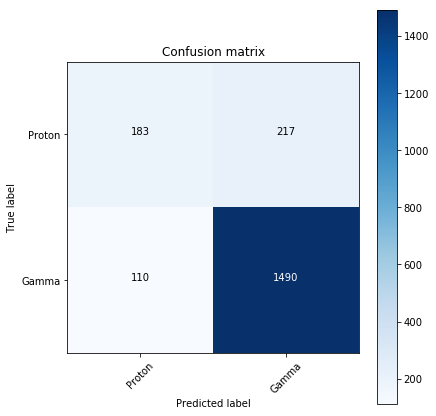

In [6]:
evaluateModel(model, paths_test, label_test, classes)